# Pymaceuticals Inc.

## Analysis

* Mice that undewent treatment with Capomulin had the highest reduction of tumor volume and highest amount of survival rate.
* Regardless of the 4 observed treatments, the numbers of metastatic sites increased with treatment duration with the placebo having the highest increase and Capomulin the lowest.
* Certain mice, as in those treated with Ketapril and Infubinol, experienced accelerated tumor growth alongside the placebo, along with increase metatstatic sites which led to less than 45% survival rate after 45 day treatment.

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [212]:
file_1 = "Resources/clinicaltrial_data.csv"
file_2 = "Resources/mouse_drug_data.csv"

_trial = pd.read_csv(file_1)
_drug_data = pd.read_csv(file_2)

In [213]:
_data = pd.merge(_trial, _drug_data, how='left', on='Mouse ID').drop_duplicates()
_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [214]:
_data.count()

Mouse ID              1904
Timepoint             1904
Tumor Volume (mm3)    1904
Metastatic Sites      1904
Drug                  1904
dtype: int64

## Tumor Response To Treatment

In [215]:
drug_data = _data.set_index(['Drug', 'Timepoint'])
average_vol = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
average_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [216]:
delta_vol = pd.DataFrame(average_vol.groupby('Drug')['Tumor Volume (mm3)'].diff().fillna(0))
delta_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                   -0.733914
          10                  -1.181796
          15                  -1.019973
          20                  -1.347992

In [217]:
pivot_data = average_vol.reset_index().pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


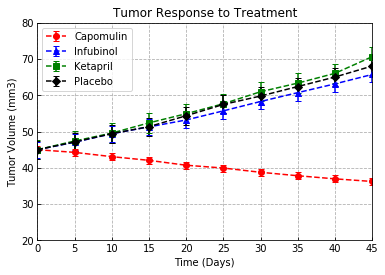

In [218]:
fig, ax = plt.subplots()

#need help with SEM concept

ax.errorbar(pivot_data.index, pivot_data['Capomulin'], pivot_data['Capomulin'].sem(), fmt='o', color="Red", linestyle='--', capsize=3)
ax.errorbar(pivot_data.index, pivot_data['Infubinol'], pivot_data['Infubinol'].sem(), fmt='^', color="Blue", linestyle='--', capsize=3)
ax.errorbar(pivot_data.index, pivot_data['Ketapril'], pivot_data['Ketapril'].sem(), fmt='s', color="Green", linestyle='--', capsize=3)
ax.errorbar(pivot_data.index, pivot_data['Placebo'], pivot_data['Placebo'].sem(), fmt='D', color="Black", linestyle='--', capsize=3)


ax.set_xlim(0,45)
ax.set_ylim(20,80)

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(linestyle='--')
ax.tick_params(direction='in')

plt.legend(loc='best')

plt.show()

## Metastatic Response To Treatment

In [219]:
_metastatic = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [220]:
delta_metastatic = pd.DataFrame(_metastatic.groupby('Drug')['Metastatic Sites'].diff().fillna(0))
delta_metastatic.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.160000
          15                 0.055000
          20                 0.277174
          25                 0.166008
          30                 0.272727
          35                 0.090909
          40                 0.199134
          45                 0.095238
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.219048
          15                 0.189474
          20                 0.321637
          25                 0.388889
          30                 0.437500
          35                 0.133929
          40                 0.285714
          45                 0.335165

In [221]:
pivot_metastatic = _metastatic.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_metastatic

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


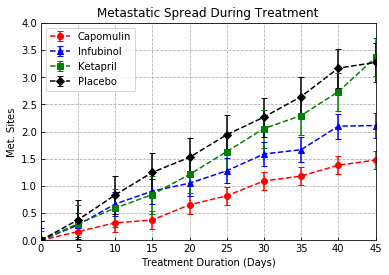

In [222]:
fig, ax2 = plt.subplots()

#need help with SEM concept

ax2.errorbar(pivot_metastatic.index, pivot_metastatic['Capomulin'], pivot_metastatic['Capomulin'].sem(), fmt='o', color="Red", linestyle='--', capsize=3)
ax2.errorbar(pivot_metastatic.index, pivot_metastatic['Infubinol'], pivot_metastatic['Infubinol'].sem(), fmt='^', color="Blue", linestyle='--', capsize=3)
ax2.errorbar(pivot_metastatic.index, pivot_metastatic['Ketapril'], pivot_metastatic['Ketapril'].sem(), fmt='s', color="Green", linestyle='--', capsize=3)
ax2.errorbar(pivot_metastatic.index, pivot_metastatic['Placebo'], pivot_metastatic['Placebo'].sem(), fmt='D', color="Black", linestyle='--', capsize=3)


ax2.set_xlim(0,45)
ax2.set_ylim(0.0,4.0)

ax2.set_title("Metastatic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")
ax2.grid(linestyle='--')
ax2.tick_params(direction='in')

plt.legend(loc='best')

plt.show()

## Survival Rates

In [223]:
mouse_count = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())
mouse_count = mouse_count.rename(columns={'Mouse ID': 'Mouse Count'})
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [224]:
pivot_mouse = mouse_count.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse Count')
pivot_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


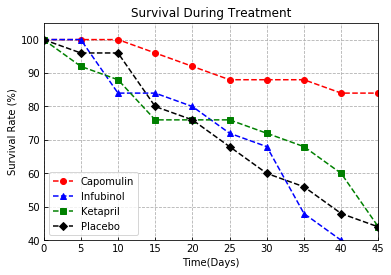

In [225]:
xmc_values = pivot_mouse.index

fig, ax3 = plt.subplots()

ax3.errorbar(xmc_values, (pivot_mouse['Capomulin']/25*100), fmt='o', color="Red", linestyle='--', capsize=3)
ax3.errorbar(xmc_values, (pivot_mouse['Infubinol']/25*100), fmt='^', color="Blue", linestyle='--', capsize=3)
ax3.errorbar(xmc_values, (pivot_mouse['Ketapril']/25*100), fmt='s', color="Green", linestyle='--', capsize=3)
ax3.errorbar(xmc_values, (pivot_mouse['Placebo']/25*100), fmt='D', color="Black", linestyle='--', capsize=3)


ax3.set_xlim(0,45)
ax3.set_ylim(40,105)

ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time(Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.grid(linestyle='--')
ax3.tick_params(direction='in')

plt.legend(loc='best')

plt.show()


## Summary Bar Graph

In [226]:
delta_percent = average_vol.groupby('Drug')['Tumor Volume (mm3)'].diff(9).dropna().reset_index()
delta_percent = delta_percent.drop('Timepoint', axis=1).rename(columns={'Tumor Volume (mm3)':'Tumor % Change'})
delta_percent['Tumor % Change'] = (delta_percent['Tumor % Change']/45)*100
delta_percent

,Drug,Tumor % Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


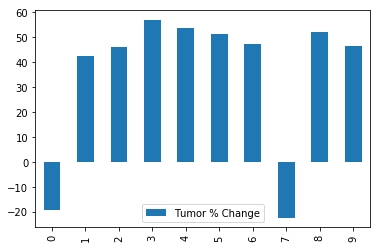

In [227]:
delta_percent.plot(kind='bar')
plt.show()


In [228]:
#sorry I couldnt complete.  Will keep at it.